<a href="https://colab.research.google.com/github/virslaan/Algorithms--SAGA/blob/main/App_DL__Part2_P1_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import MobileNet, NASNetMobile, DenseNet121, VGG16 
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Part2 P1



In [11]:
#mount google drive
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!ls "/content/drive/MyDrive/Dataset_adl2/"

train  validation


In [26]:
base_dir = '/content/drive/MyDrive/Dataset_adl2/'
train_dir = '/content/drive/MyDrive/Dataset_adl2/'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_curl_dir = os.path.join(train_dir, '/train_1')
train_walk_dir = os.path.join(train_dir, '/train_2')
train_thinker_dir = os.path.join(train_dir, '/train_3')

validation_curl_dir = os.path.join(validation_dir, '/validation_1')
validation_walk_dir = os.path.join(validation_dir, '/validation_2')
validation_thinker_dir = os.path.join(validation_dir, '/validation_3')


# test_mater_dir = os.path.join(test_dir, 'mater')
# test_matelier_dir = os.path.join(test_dir, 'matelier')
# test_amringe_dir = os.path.join(test_dir, 'amringe')

In [28]:
os.path.join(train_dir, '/train_1')

'/train_1'

In [36]:
num_curl_tr = len(os.listdir('/content/drive/MyDrive/Dataset_adl2/train/train_1'))
num_walk_tr = len(os.listdir('/content/drive/MyDrive/Dataset_adl2/train/train_2'))
num_thinker_tr = len(os.listdir('/content/drive/MyDrive/Dataset_adl2/train/train_3'))

num_curl_val = len(os.listdir('/content/drive/MyDrive/Dataset_adl2/validation/validation_1'))
num_walk_val = len(os.listdir('/content/drive/MyDrive/Dataset_adl2/validation/validation_2'))
num_thinker_val = len(os.listdir('/content/drive/MyDrive/Dataset_adl2/validation/validation_3'))

# num_mater_test = len(os.listdir(test_mater_dir))
# num_matelier_test = len(os.listdir(test_matelier_dir))
# num_amringe_test = len(os.listdir(test_amringe_dir))


total_train = num_curl_tr + num_walk_tr + num_thinker_tr
total_val = num_curl_val + num_walk_val + num_thinker_val
# total_test = num_mater_test + num_matelier_test + num_amringe_test

In [37]:
print('Training curl images:', num_curl_tr)
print('Training college walk images:', num_walk_tr)
print('Training thinker images:', num_thinker_tr)

print('Validation curl images:', num_curl_val)
print('Validation college walk images:', num_walk_val)
print('Validation thinker images:', num_thinker_val)


# print('Test mater images:', num_mater_test)
# print('Test matelier images:', num_matelier_test)
# print('Test amringe images:', num_amringe_test)

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)
#print("Total test images:", total_test)

Training curl images: 50
Training college walk images: 50
Training thinker images: 50
Validation curl images: 46
Validation college walk images: 50
Validation thinker images: 49
--
Total training images: 150
Total validation images: 145


In [39]:
TARGET_SHAPE = 150 
BATCH_SIZE = 32

#create train ImageDataGenerator
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#feed in training dataset into ImageDataGenerator Object to get augmented training dataset
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Create validation dataset without any augmentation
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

# Create test dataset without any augmentation
# image_gen_test = ImageDataGenerator(rescale=1./255)
# test_data_gen = image_gen_val.flow_from_directory(
#     batch_size=BATCH_SIZE, 
#     directory=test_dir, 
#     target_size=(TARGET_SHAPE, TARGET_SHAPE),
#     class_mode='categorical')

Found 150 images belonging to 3 classes.
Found 145 images belonging to 3 classes.


## Display Sample Training Images

In [40]:
sample_training_images, sample_training_labels = next(train_data_gen)


In [41]:
# This function will plot images in a grid with 1 row and 5 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

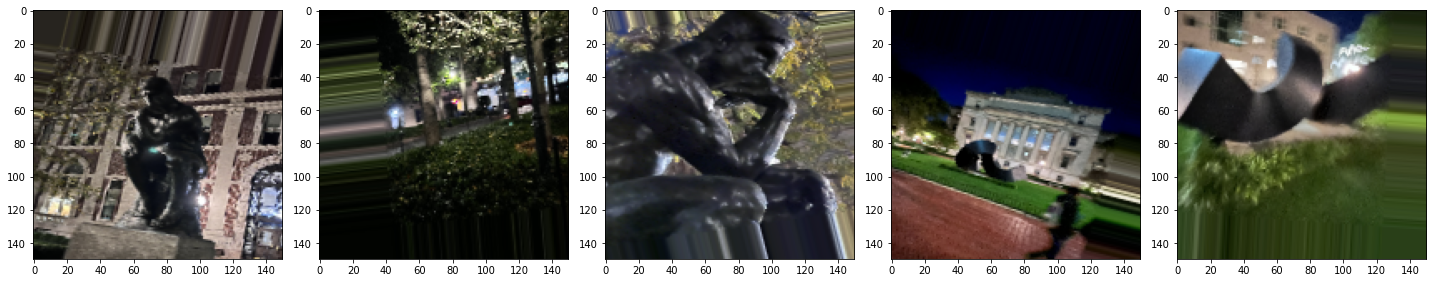

In [42]:
#plot training images
plotImages(sample_training_images[:5])

# Part2 P2


## VGG16
I will apply transfer learning on VGG16 model

In [43]:
#download pretrained vgg16 model
vgg16_conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [44]:
vgg16_conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [45]:
#build a new model with trained vgg16
vgg16_model = Sequential()
vgg16_model.add(vgg16_conv_base)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(3, activation='softmax'))

In [46]:
vgg16_model.summary()
#dont allow weight to be updated in pretrained VGG16 model
vgg16_conv_base.trainable = False

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 18,911,043
Trainable params: 18,911,043
Non-trainable params: 0
_________________________________________________________________


In [47]:
EPOCHS = 40


In [48]:
#select the loss function and optimizer
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train Transfer Learning
vgg16_history = vgg16_model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/40
5/5 - 332s - loss: 2.6038 - acc: 0.4200 - val_loss: 1.7820 - val_acc: 0.4138 - 332s/epoch - 66s/step
Epoch 2/40
5/5 - 40s - loss: 0.8046 - acc: 0.7133 - val_loss: 1.0380 - val_acc: 0.5517 - 40s/epoch - 8s/step
Epoch 3/40
5/5 - 40s - loss: 0.4362 - acc: 0.8467 - val_loss: 0.3785 - val_acc: 0.8552 - 40s/epoch - 8s/step
Epoch 4/40
5/5 - 40s - loss: 0.2452 - acc: 0.9333 - val_loss: 0.3846 - val_acc: 0.7931 - 40s/epoch - 8s/step
Epoch 5/40
5/5 - 40s - loss: 0.2151 - acc: 0.9133 - val_loss: 0.6277 - val_acc: 0.7310 - 40s/epoch - 8s/step
Epoch 6/40
5/5 - 40s - loss: 0.1947 - acc: 0.9267 - val_loss: 0.6174 - val_acc: 0.8138 - 40s/epoch - 8s/step
Epoch 7/40
5/5 - 43s - loss: 0.1439 - acc: 0.9533 - val_loss: 0.6742 - val_acc: 0.6966 - 43s/epoch - 9s/step
Epoch 8/40
5/5 - 40s - loss: 0.1494 - acc: 0.9267 - val_loss: 0.3168 - val_acc: 0.8897 - 40s/epoch - 8s/step
Epoch 9/40
5/5 - 40s - loss: 0.1079 - acc: 0.9533 - val_loss: 0.4972 - val_acc: 0.8276 - 40s/epoch - 8s/step
Epoch 10/40
5/5 

### Plot Training and Validation Loss and Accuracy

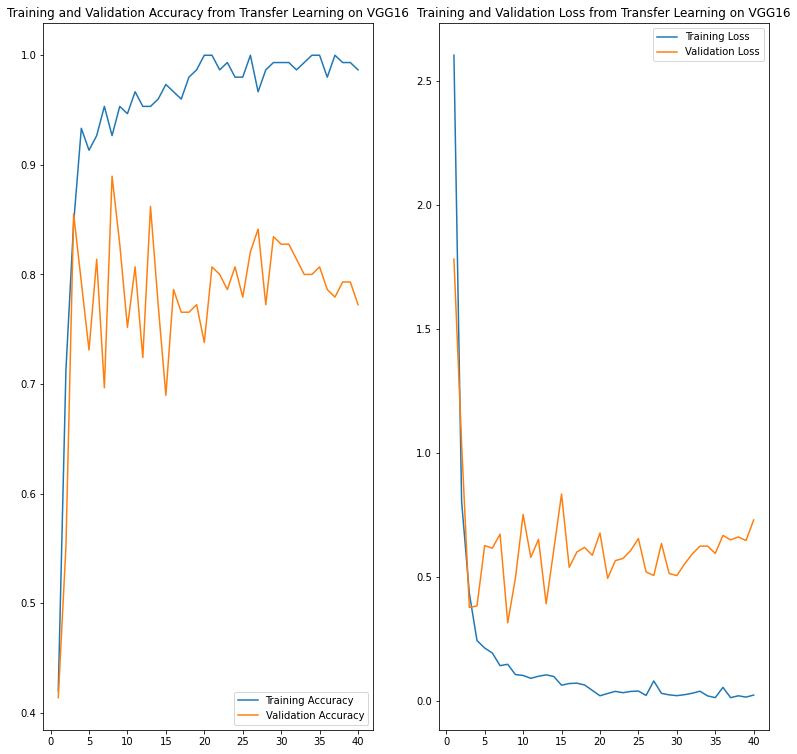

In [49]:
acc = vgg16_history.history['acc']
val_acc = vgg16_history.history['val_acc']

loss = vgg16_history.history['loss']                                              
val_loss = vgg16_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on VGG16')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on VGG16')
plt.show()

### Show Testing Loss and Accuracy

In [51]:
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(train_data_gen, verbose=1)

5/5 [==============================] - 22s 4s/step - loss: 0.0437 - acc: 0.9867


In [ ]:
print('The VGG16 test accuracy is', vgg16_test_accuracy, 'and the test loss is', vgg16_test_loss)

The test accuracy is 0.000861 and the test loss is 1.
